# 120 vuotta olympia kilpailijoita (1896-2016)

## alkukäsittely

Rivejä on 270 000 ja 15 saraketta, joista päätimme tarkestella vain mitalisteja.  
Koska halusimme tarkastella vain mitalisteja poistimme kaikki jotka eivät ole voittaneet mitään.  
poistemme noin 231 000 riviä mitalli sarakkeesta, jolloin jäljelle jäi vain mitalisteja on vain 39783.  
Koska yksi henkilö voi voittaa monta mitalia monena vuotana ja jopa samoissa kisoissa, emme poistaneet duplikaatteja.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("athlete_events.csv")

data.head()

data = data.dropna(subset = ['Medal'])
missing_count = data.isnull().sum()
print(missing_count)

missing_count = data.isnull().sum()

total_data = np.prod(data.shape)
total_missing = missing_count.sum()
per_of_missing_data = (total_missing / total_data) * 100
print("null: ", per_of_missing_data, "%")

ID           0
Name         0
Sex          0
Age        732
Height    8711
Weight    9327
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64
null:  3.1453971126695657 %


### poikkeamat

nuorin ja vanhin mitalisti ovat 10 ja 73.  


In [42]:
vanhin = np.max(data['Age'])
nuorin = np.min(data['Age'])
print("vanhin ", vanhin, "nuorin ", nuorin)

ukko = data.loc[(data['Age'] == 73)]
nouri = data.loc[(data['Age'] == 10)]
print(ukko)
print(nouri)

vanhin  73.0 nuorin  10.0
          ID                                           Name Sex   Age  Height  \
44584  22984  John (Herbert Crawford-) Copley (Williamson-)   M  73.0     NaN   

       Weight           Team  NOC        Games  Year  Season    City  \
44584     NaN  Great Britain  GBR  1948 Summer  1948  Summer  London   

                  Sport                                          Event   Medal  
44584  Art Competitions  Art Competitions Mixed Painting, Graphic Arts  Silver  
           ID                Name Sex   Age  Height  Weight  \
142882  71691  Dimitrios Loundras   M  10.0     NaN     NaN   

                                 Team  NOC        Games  Year  Season    City  \
142882  Ethnikos Gymnastikos Syllogos  GRE  1896 Summer  1896  Summer  Athina   

             Sport                                  Event   Medal  
142882  Gymnastics  Gymnastics Men's Parallel Bars, Teams  Bronze  


## ??????????????????????

In [31]:


# Lets make a simple dataframe
ages = data.loc[(data['Age'] > 0)]
df_ages = pd.DataFrame(ages)
# to divide them into bins of 20 - 25, 26 - 35 , 36- 45 & > 46, define the bin edges
bins = [20,25,35,45,90]

# lets create lables for each bin
labels = ['Young', 'Adult', 'MiddleAged', 'Elderly']

# we will use cut function to bin
df_ages['AgeGroup'] = pd.cut(df_ages['age'], bins=bins, labels=labels, right=False)

# Get the list of categories
categories_list = df_ages['AgeGroup'].cat.categories.tolist()
print(categories_list)

# Count the values in each bin
bin_counts = df_ages['AgeGroup'].value_counts()
print(bin_counts)

KeyError: 'Age'

## Data objects and Atributes and statistics

Binäärejä arvoja ei meillä ollut

In [30]:
df = pd.read_csv('athlete_events.csv')


nominal_columns = [col for col in df.columns if df[col].dtype == 'object']
print("Nominal Attributes:", nominal_columns)

ordinal_columns = ['Age'] 
print("Ordinal Attributes:", ordinal_columns)


for col in df.select_dtypes(include=np.number).columns:
    data = df[col].dropna()
    print(f"Statistics for {col}:")
    print(f"Mean: {np.mean(data):.2f}")
    print(f"Median: {np.median(data):.2f}")
    print(f"Standard Deviation: {np.std(data):.2f}")
    print(f"Min: {np.min(data):.2f}, Max: {np.max(data):.2f}")
    print("-" * 30)

Nominal Attributes: ['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal']
Ordinal Attributes: ['Age']
Statistics for ID:
Mean: 68248.95
Median: 68205.00
Standard Deviation: 39022.21
Min: 1.00, Max: 135571.00
------------------------------
Statistics for Age:
Mean: 25.56
Median: 24.00
Standard Deviation: 6.39
Min: 10.00, Max: 97.00
------------------------------
Statistics for Height:
Mean: 175.34
Median: 175.00
Standard Deviation: 10.52
Min: 127.00, Max: 226.00
------------------------------
Statistics for Weight:
Mean: 70.70
Median: 70.00
Standard Deviation: 14.35
Min: 25.00, Max: 214.00
------------------------------
Statistics for Year:
Mean: 1978.38
Median: 1988.00
Standard Deviation: 29.88
Min: 1896.00, Max: 2016.00
------------------------------


## Visualization

### ikä jakauma


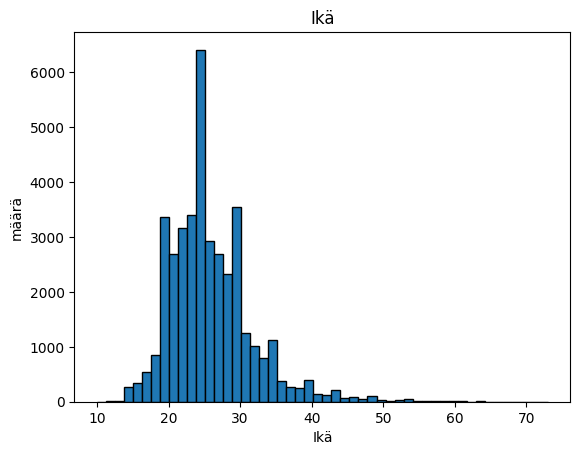

In [36]:

column_data = data["Age"]
plt.hist(column_data, bins = 50, edgecolor = "black")

plt.xlabel('Ikä')
plt.ylabel('määrä')
plt.title('Ikä')

plt.show()

### sukupuoli jakauma

naiset saivat osallistua olympialaisiin vasta 1900. Noin 1000:sta osallistujasta vain 22 oli naisia ja he saivat osallistua vain muutamiin lajeihin.  



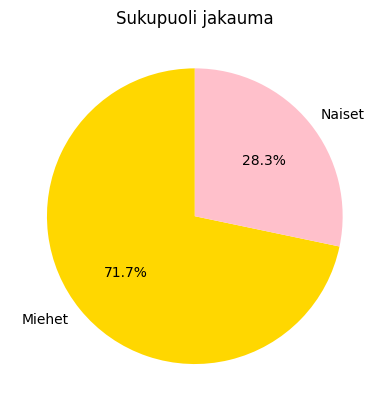

In [37]:
#sukupuoli jakauma

column_data = data["Sex"]

miehet =  data[data['Sex'] == 'M'].shape[0]
naiset =  data[data['Sex'] == 'F'].shape[0]
colors = ['gold', 'pink']

arvot = [miehet, naiset]
Labels = ["Miehet", "Naiset"]

plt.pie(arvot, labels = Labels, colors = colors, autopct = '%1.1f%%', startangle = 90)

plt.title("Sukupuoli jakauma")

plt.show()

### Top 10 Mitali maat

Yhdysvallat on voittanut selvästi enemmän kuin mikään muu maa.  
Suomi jää sijalle 17

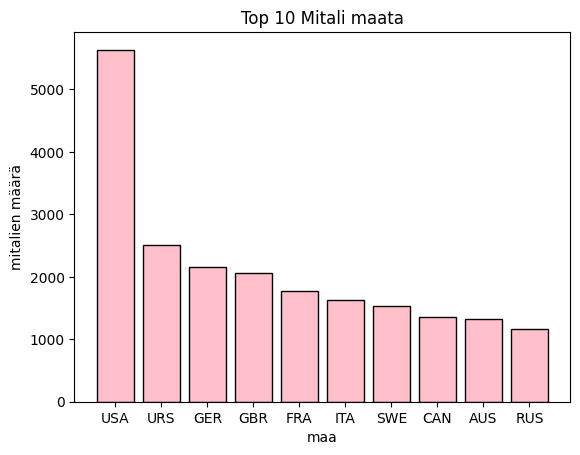

In [38]:
mitali_maat = data["NOC"].value_counts().head(10)

maat = mitali_maat.index
maara = mitali_maat.values

plt.bar(maat, maara, color = 'pink', edgecolor = 'black')

plt.xlabel('maa')
plt.ylabel('mitalien määrä')
plt.title('Top 10 Mitali maata')

plt.show()

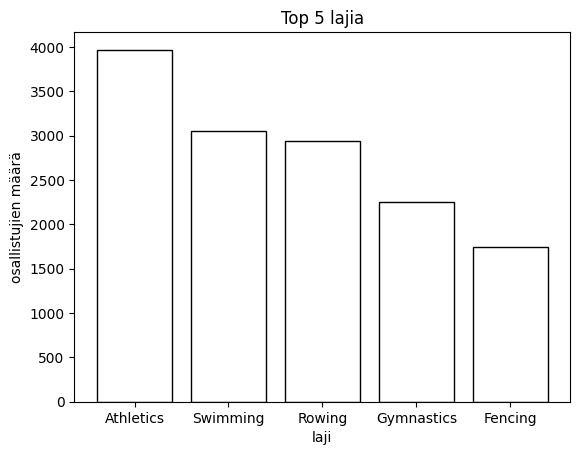

In [52]:
mitali_maat = data["Sport"].value_counts().head(5)

maat = mitali_maat.index
maara = mitali_maat.values

plt.bar(maat, maara, color = 'white', edgecolor = 'black')

plt.xlabel('laji')
plt.ylabel('osallistujien määrä')
plt.title('Top 5 lajia')

plt.show()

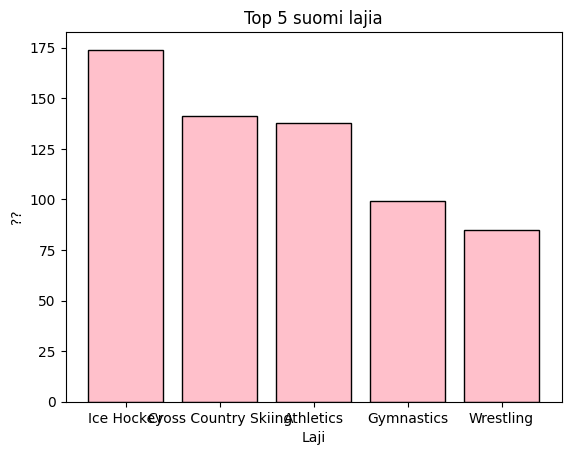

In [13]:
suomi_lajit = data[data['NOC'] == 'FIN']['Sport'].value_counts().head(5)

maat = suomi_lajit.index
maara = suomi_lajit.values

plt.bar(maat, maara, color='pink', edgecolor='black')

plt.xlabel('Laji')
plt.ylabel('??')
plt.title('Top 5 suomi lajia')

plt.show()